In [1]:
import pandas as pd
import numpy as np
import os
from pathlib import Path

Prepare raw bitcoin file

In [2]:
# read 
df = pd.read_csv("data_raw/bitcoin_2015_to_2023.csv")
df["Date"] = pd.to_datetime(df["Date"])
df = df.rename(columns={"Date":"datetime", "Open":"open"})

# filter to 2022
df = df.loc[(df["datetime"] >= "2021-12-01") & (df["datetime"] <= "2022-12-31")]

Aggregate to day: visualize bitcoin price in 2022

In [3]:
freq = "D"
dfd = df.groupby(pd.Grouper(key="datetime", freq=freq))["open"].first().to_frame()

<Axes: xlabel='datetime'>

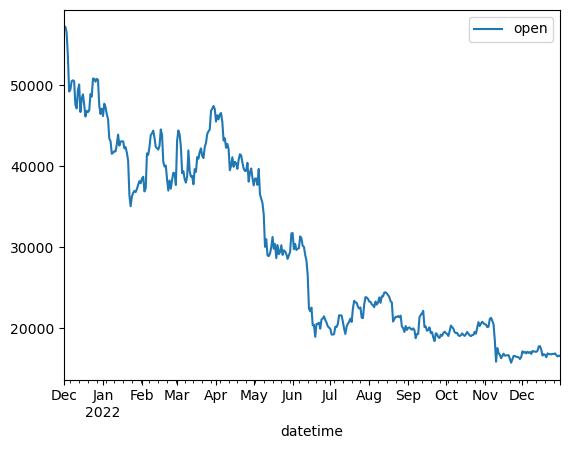

In [4]:
dfd.plot()

Aggregate to hourly

In [5]:
freq = "H"
dfh = df.groupby(pd.Grouper(key="datetime", freq=freq))["open"].first().to_frame().copy()

C:\Users\jakob\AppData\Local\Temp\ipykernel_25072\264218126.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dfh = df.groupby(pd.Grouper(key="datetime", freq=freq))["open"].first().to_frame().copy()


In [6]:
lags = [5,24]
for lag in lags:
    # compute lagged time series
    dfh.loc[:,f"open_lag_{lag}"] = dfh["open"].shift(periods=-lag)

    # compute lagged performance
    dfh[f"perf_{lag}"] = (dfh[f"open_lag_{lag}"] - dfh["open"]) / dfh["open"]
dfh = dfh[dfh.index.to_series().between('2022-01-01', '2022-12-31')]

In [8]:
#  export hourly data
dfh.to_csv("data_2022/bitcoin_hourly.csv")

Add signal

In [14]:
dfh.loc[:,"rand_signal"] = np.random.rand(dfh.shape[0])

In [15]:
dfh

,open,open_lag_5,perf_5,open_lag_24,perf_24,rand_signal
datetime,,,,,,
2022-01-01 00:00:00,46220.00,46666.97,0.009670,47124.24,0.019564,0.149227
2022-01-01 01:00:00,46663.14,45707.67,-0.020476,47102.28,0.009411,0.106665
2022-01-01 02:00:00,46779.88,45888.94,-0.019045,47140.67,0.007713,0.673952
2022-01-01 03:00:00,46810.78,46329.08,-0.010290,46988.38,0.003794,0.002874
2022-01-01 04:00:00,46806.83,46320.28,-0.010395,47207.99,0.008571,0.576087
...,...,...,...,...,...,...
2022-12-30 20:00:00,16516.91,16400.46,-0.007050,16600.99,0.005091,0.168701
2022-12-30 21:00:00,16550.00,16550.09,0.000005,16595.70,0.002761,0.177479
2022-12-30 22:00:00,16581.89,16549.00,-0.001983,16583.72,0.000110,0.650944


In [16]:
lag = 24
dfh["real"] = dfh[f"perf_{lag}"] * dfh["rand_signal"]

<Axes: >

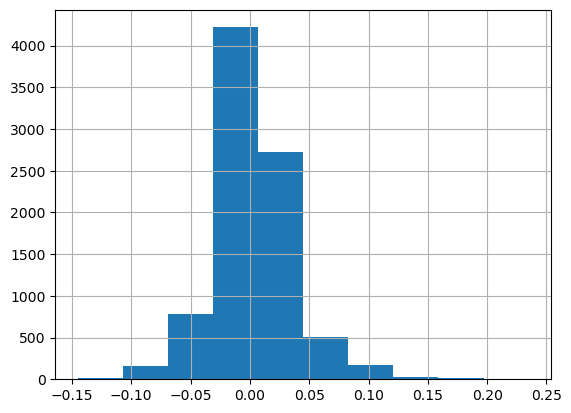

In [11]:
dfh["perf_24"].hist()

<Axes: xlabel='datetime'>

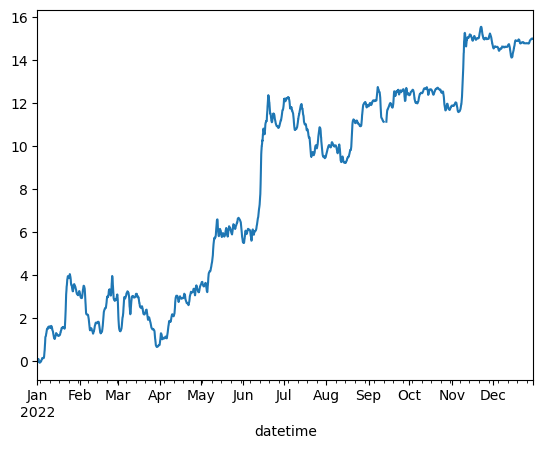

In [17]:
dfh["real"].cumsum().plot()